In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [212]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = pd.merge(test, train, how='inner', on='Id')

In [213]:
columns = ['Transported_x', 'Transported_y']
test = test.drop(columns, axis=1)

In [214]:
train = train[train["Transported"].notnull()]

In [215]:
train.head()

,Id,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0
5,5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1.0


In [216]:
test.head()

,Id,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,304,0337_02,Mars,False,F/63/S,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,3.0,1057.0,Weros Perle
1,2697,2891_01,Earth,False,G/460/S,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,0.0,1.0,Gleney Ortinericey
2,8424,8998_01,Earth,True,G/1449/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Gerry Englence
3,1672,1771_01,Earth,False,G/291/P,TRAPPIST-1e,35.0,False,0.0,338.0,436.0,NaN,0.0,Antone Cardner
4,8458,9034_02,Europa,True,D/288/P,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Errairk Crakete


In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 1 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            6954 non-null   int64  
 1   PassengerId   6954 non-null   object 
 2   HomePlanet    6786 non-null   object 
 3   CryoSleep     6777 non-null   object 
 4   Cabin         6796 non-null   object 
 5   Destination   6815 non-null   object 
 6   Age           6806 non-null   float64
 7   VIP           6792 non-null   object 
 8   RoomService   6828 non-null   float64
 9   FoodCourt     6814 non-null   float64
 10  ShoppingMall  6789 non-null   float64
 11  Spa           6820 non-null   float64
 12  VRDeck        6803 non-null   float64
 13  Name          6795 non-null   object 
 14  Transported   6954 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 869.2+ KB


In [218]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,6954.0,4344.528329,2498.426319,1.0,2192.25,4329.5,6507.75,8692.0
Age,6806.0,28.828093,14.446399,0.0,19.00,27.0,38.00,79.0
RoomService,6828.0,222.822935,674.900407,0.0,0.00,0.0,46.00,14327.0
FoodCourt,6814.0,456.714705,1574.797221,0.0,0.00,0.0,84.75,27723.0
ShoppingMall,6789.0,175.499043,613.969158,0.0,0.00,0.0,30.00,23492.0
Spa,6820.0,315.693842,1118.074541,0.0,0.00,0.0,61.25,18572.0
VRDeck,6803.0,304.189769,1170.639327,0.0,0.00,0.0,49.50,24133.0
Transported,6954.0,0.503307,0.500025,0.0,0.00,1.0,1.00,1.0


# data visualization

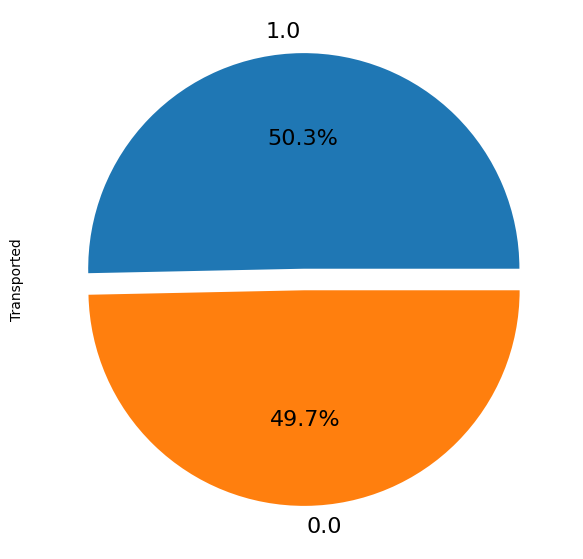

In [219]:
# Transported

plt.figure(figsize=(7,7))
train['Transported'].value_counts().plot.pie(explode = [0.05, 0.05] , 
                                             autopct = '%1.1f%%' , 
                                             textprops = {'fontsize' : 16 })
plt.show();

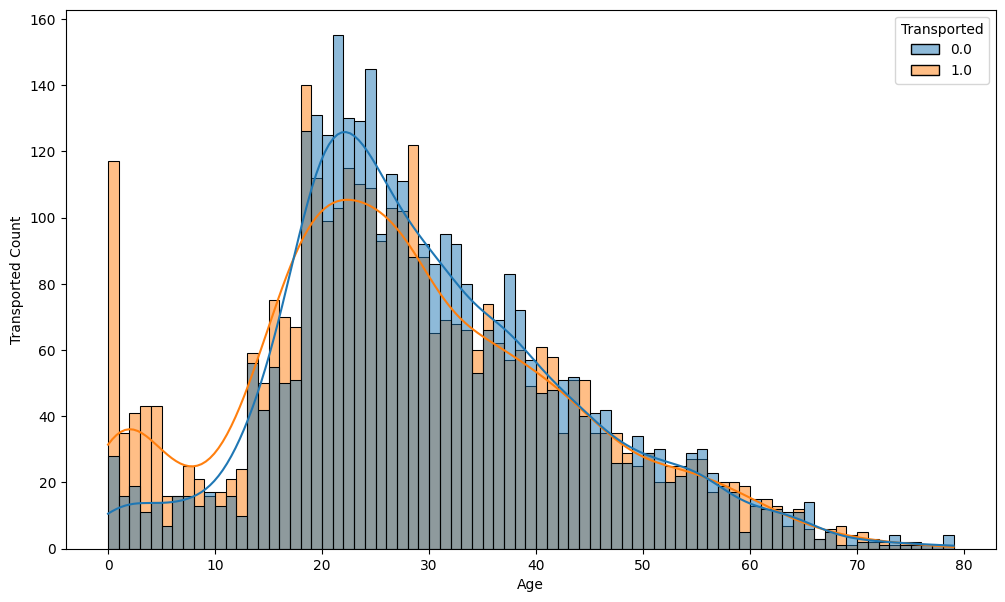

In [220]:
# Age

plt.figure(figsize=(12,7))
sns.histplot(data= train, x= 'Age', hue= 'Transported', binwidth = 1, kde = True)
plt.xlabel('Age')
plt.ylabel('Transported Count')
plt.show();

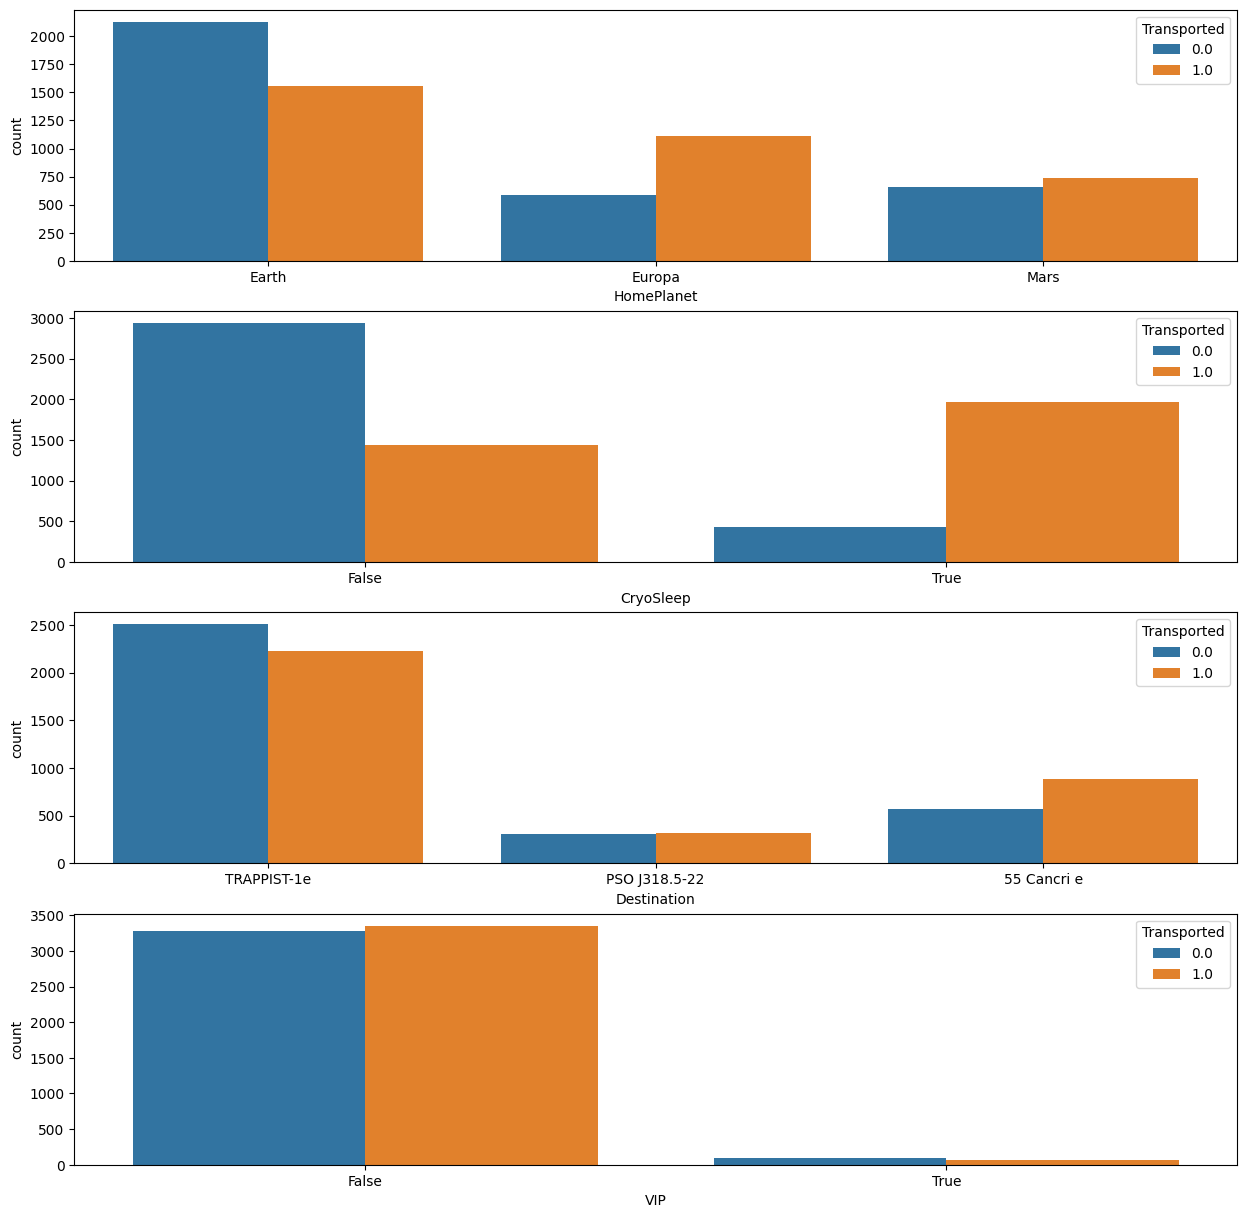

In [221]:
# Categorical

graph_cat = ['HomePlanet' , 'CryoSleep' , 'Destination' , 'VIP']

fig = plt.figure(figsize= (15,15))

for i, name in enumerate(graph_cat):
    
    ax = fig.add_subplot(4, 1, i+1)
    sns.countplot(data= train, axes= ax, x= name, hue= 'Transported')

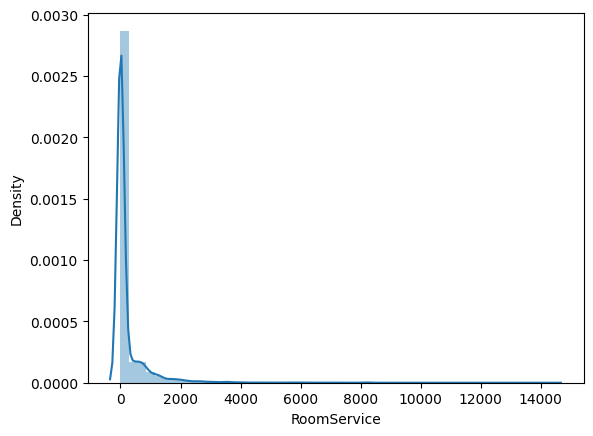

In [222]:
# Numerical 

sns.distplot(train['RoomService']);

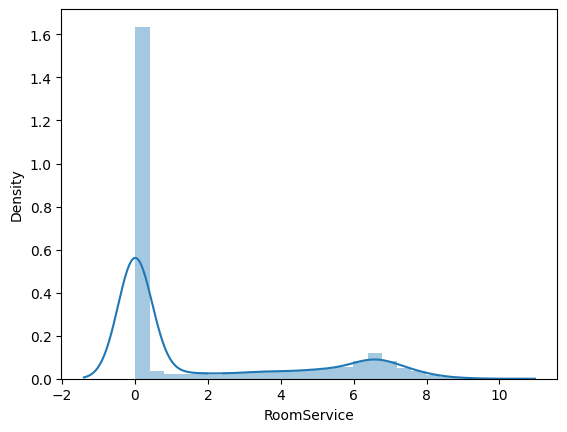

In [223]:
sns.distplot(np.log(train['RoomService']+1));

# missing value

In [224]:
train.isnull().sum()

Id                0
PassengerId       0
HomePlanet      168
CryoSleep       177
Cabin           158
Destination     139
Age             148
VIP             162
RoomService     126
FoodCourt       140
ShoppingMall    165
Spa             134
VRDeck          151
Name            159
Transported       0
dtype: int64

In [225]:
test.isnull().sum()

Id               0
PassengerId      0
HomePlanet      33
CryoSleep       40
Cabin           41
Destination     43
Age             31
VIP             41
RoomService     55
FoodCourt       43
ShoppingMall    43
Spa             49
VRDeck          37
Name            41
dtype: int64

In [226]:
# Age

train_test = [train, test]

for data_age in train_test:
    
    mean = data_age['Age'].mean()
    std = data_age['Age'].std()
    is_null = data_age['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age = data_age['Age'].copy()
    age[np.isnan(age)] = rand_age
    data_age['Age'] = age
    data_age['Age'] = data_age['Age'].astype(int)

In [227]:
# Categorical 

for data_obj in train_test:
    
    data_obj['HomePlanet'] = data_obj['HomePlanet'].fillna(data_obj['HomePlanet'].mode()[0])
    data_obj['CryoSleep'] = data_obj['CryoSleep'].fillna(data_obj['CryoSleep'].mode()[0])
    data_obj['Cabin'] = data_obj['Cabin'].fillna(data_obj['Cabin'].mode()[0])
    data_obj['Destination'] = data_obj['Destination'].fillna(data_obj['Destination'].mode()[0])
    data_obj['VIP'] = data_obj['VIP'].fillna(data_obj['VIP'].mode()[0])

In [228]:
train.isnull().sum()

Id                0
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     126
FoodCourt       140
ShoppingMall    165
Spa             134
VRDeck          151
Name            159
Transported       0
dtype: int64

In [229]:
# Numerical 

for data_num in train_test:
    
    data_num['RoomService'] = np.log(data_num['Spa']+1) 
    data_num['ShoppingMall'] = np.log(data_num['ShoppingMall']+1) 
    data_num['Spa'] = np.log(data_num['Spa']+1) 
    data_num['VRDeck'] = np.log(data_num['VRDeck']+1) 
    data_num['FoodCourt'] = np.log(data_num['FoodCourt']+1) 

    data_num['RoomService'] = data_num['RoomService'].fillna(data_num['RoomService'].median())
    data_num['ShoppingMall'] = data_num['ShoppingMall'].fillna(data_num['ShoppingMall'].median())
    data_num['Spa'] = data_num['Spa'].fillna(data_num['Spa'].median())
    data_num['VRDeck'] = data_num['VRDeck'].fillna(data_num['VRDeck'].median())
    data_num['FoodCourt'] = data_num['FoodCourt'].fillna(data_num['FoodCourt'].median())

In [230]:
train.isnull().sum()

Id                0
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            159
Transported       0
dtype: int64

In [231]:
# Drop Name

for data_name in train_test:
    data_name.drop('Name', axis=1, inplace=True)

In [232]:
train.isnull().sum()

Id              0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [233]:
# Label Encoding 

for data in train_test:
    
    data['HomePlanet'] =data['HomePlanet'].astype('category').cat.codes
    data['Destination'] =data['Destination'].astype('category').cat.codes

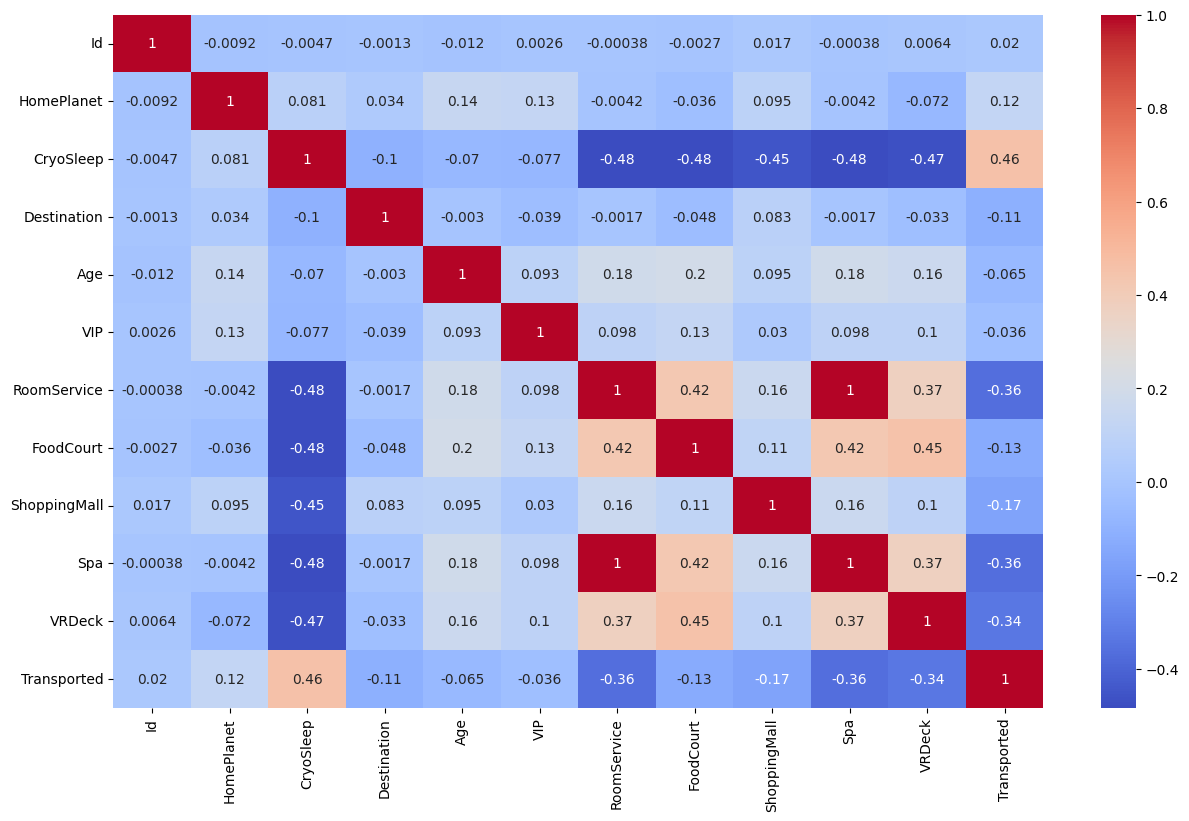

In [234]:
# Corr Matrix

corr = train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot= True, cmap= 'coolwarm');

In [235]:
# Data cleaning for model

train = train.drop('Cabin', axis= 1)
test = test.drop('Cabin', axis= 1)

# model

In [236]:
X = train.drop('Transported', axis=1)
y = train['Transported']
X_test = test 

In [237]:
X.head()

,Id,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1,1,0002_01,0,False,2,24,False,6.309918,2.302585,3.258097,6.309918,3.806662
2,2,0003_01,1,False,2,58,True,8.812248,8.182280,0.000000,8.812248,3.912023
3,3,0003_02,1,False,2,33,False,8.110728,7.157735,5.918894,8.110728,5.267858
4,4,0004_01,0,False,2,16,False,6.338594,4.262680,5.023881,6.338594,1.098612
5,5,0005_01,0,False,1,44,False,5.676754,6.182085,0.000000,5.676754,0.000000


In [238]:
y.head()

1    1.0
2    0.0
3    0.0
4    1.0
5    1.0
Name: Transported, dtype: float64

In [239]:
X_test.head()

,Id,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,304,0337_02,2,False,2,19,False,1.386294,5.857933,6.453625,1.386294,6.964136
1,2697,2891_01,0,False,2,18,False,0.000000,6.807935,0.000000,0.000000,0.693147
2,8424,8998_01,0,True,2,41,False,0.000000,0.000000,0.000000,0.000000,0.000000
3,1672,1771_01,0,False,2,35,False,0.000000,5.826000,6.079933,0.000000,0.000000
4,8458,9034_02,1,True,2,43,False,0.000000,0.000000,0.000000,0.000000,0.000000


In [240]:
from sklearn.model_selection import train_test_split, cross_val_score

In [241]:
def classify(model, xx, yy):
    
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state= 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = KNeighborsClassifier(n_neighbors= 7)

model_rf = RandomForestClassifier(max_depth=80, min_samples_leaf=18, min_samples_split=3, n_estimators=70)
# model_rf.fit(x_train, y_train)

# model = DecisionTreeClassifier(random_state=3)
# cross_val_score(model, X, y, cv=10)

classify(model_rf, X, y)

Accuracy:  0.7936736161035226
CV Score:  0.7625849629426581


In [243]:
X_test

,Id,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,304,0337_02,2,False,2,19,False,1.386294,5.857933,6.453625,1.386294,6.964136
1,2697,2891_01,0,False,2,18,False,0.000000,6.807935,0.000000,0.000000,0.693147
2,8424,8998_01,0,True,2,41,False,0.000000,0.000000,0.000000,0.000000,0.000000
3,1672,1771_01,0,False,2,35,False,0.000000,5.826000,6.079933,0.000000,0.000000
4,8458,9034_02,1,True,2,43,False,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1734,7175,7656_01,0,True,2,16,False,0.000000,0.000000,0.000000,0.000000,0.000000
1735,3187,3437_02,0,True,2,0,False,0.000000,0.000000,0.000000,0.000000,0.000000
1736,1302,1384_01,0,False,2,17,False,5.564520,0.000000,6.538140,5.564520,1.791759
1737,5934,6300_01,2,True,2,42,False,0.000000,0.000000,0.000000,0.000000,0.000000


In [244]:
# model_rf = RandomForestClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=8, n_estimators=50)
# model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(X_test)
# print(model.score(x_test, y_test))

y_submission = model_rf.predict(X_test) 

In [245]:
submission = pd.DataFrame({
        "Id": pd.read_csv('test.csv')["Id"],
        "Transported": y_submission
    })

In [246]:
submission["Transported"] = submission["Transported"].astype(int)

In [247]:
submission.to_csv('submission.csv', index=False)

# Now try other models
# Or tune your parameters

## Try Decision Tree
## Try Other models
## Try other parameters